# PREPROCESSING

In [98]:
import pandas as pd
import numpy as np
from scipy import stats

In [99]:
# Load Sales Data 1 & 2
sales1 = pd.read_csv("Sales Data 1.csv")
sales2 = pd.read_csv("Sales Data 2.csv")

# Combine both datasets
sales = pd.concat([sales1, sales2], ignore_index=True)

sales.to_csv("sales.csv", index=False)

# Display basic info
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27156 entries, 0 to 27155
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Branch          24780 non-null  object 
 1   Bill No         24780 non-null  object 
 2   Bill_date       24780 non-null  object 
 3   Maker           23452 non-null  object 
 4   Category        24780 non-null  object 
 5   Product         24780 non-null  object 
 6   Design          24679 non-null  object 
 7   Sub_Design      24123 non-null  object 
 8   Weight Range    20817 non-null  object 
 9   Size            11995 non-null  object 
 10  Pcs             24780 non-null  float64
 11  Gwt(Grams)      24780 non-null  float64
 12  Sales_Value     24780 non-null  float64
 13  Age             24780 non-null  float64
 14  Employee        24766 non-null  object 
 15  Purchase Value  24780 non-null  float64
 16  Unnamed: 16     0 non-null      float64
dtypes: float64(6), object(11)
memor

In [100]:
sales.dropna(how="all", inplace=True)
sales.dropna(axis=1, how="all", inplace=True)

In [101]:
print(sales.isnull().sum())

Branch                0
Bill No               0
Bill_date             0
Maker              1328
Category              0
Product               0
Design              101
Sub_Design          657
Weight Range       3963
Size              12785
Pcs                   0
Gwt(Grams)            0
Sales_Value           0
Age                   0
Employee             14
Purchase Value        0
dtype: int64


In [102]:
# Fill missing numerical values with median
num_cols = ["Purchase Value"]
for col in num_cols:
    sales[col].fillna(sales[col].median(), inplace=True)

# Fill missing categorical values with mode
cat_cols = ["Design", "Sub_Design", "Maker", "Employee"]
for col in cat_cols:
    sales[col].fillna(sales[col].mode()[0], inplace=True)


<ipython-input-102-78dde0e33c76>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales[col].fillna(sales[col].median(), inplace=True)
<ipython-input-102-78dde0e33c76>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [103]:
print(sales.isnull().sum())

Branch                0
Bill No               0
Bill_date             0
Maker                 0
Category              0
Product               0
Design                0
Sub_Design            0
Weight Range       3963
Size              12785
Pcs                   0
Gwt(Grams)            0
Sales_Value           0
Age                   0
Employee              0
Purchase Value        0
dtype: int64


In [104]:
# Convert Bill_date to datetime format
sales["Bill_date"] = pd.to_datetime(sales["Bill_date"], format="%d-%m-%Y")

In [105]:
def standardize_weight_range(weight):
    if pd.isna(weight):  # Check for NaN
        return weight

    weight = weight.replace(" GRAMS", "").replace("&ABOVE", "").replace("ABOVE ", "")

    if "-" in weight:
        return weight  # Already a range

    return f"{weight}-30"  # Assuming 30 as an upper bound for "ABOVE" values

# Apply transformation
sales["Weight Range"] = sales["Weight Range"].apply(standardize_weight_range)

In [106]:
def clean_size(size):
    if pd.isna(size):  # Handle NaN values
        return None

    size = str(size).replace(" INCH", "").replace(" MM", "")

    # Ensure the remaining value is numeric before converting to float
    if size.isdigit():
        return float(size)

    return None  # Return None for non-numeric values

# Apply the function
sales["Size"] = sales["Size"].apply(clean_size)


In [107]:
# Ensure "Weight Range" is properly split into numeric columns
sales[["Weight Min", "Weight Max"]] = sales["Weight Range"].str.split("-", expand=True)

# Convert to numeric (handle errors if needed)
sales["Weight Min"] = pd.to_numeric(sales["Weight Min"], errors="coerce")
sales["Weight Max"] = pd.to_numeric(sales["Weight Max"], errors="coerce")

# Fill missing values with the median
sales["Weight Min"].fillna(sales["Weight Min"].median(), inplace=True)
sales["Weight Max"].fillna(sales["Weight Max"].median(), inplace=True)


<ipython-input-107-8966ebce28e8>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales["Weight Min"].fillna(sales["Weight Min"].median(), inplace=True)
<ipython-input-107-8966ebce28e8>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [108]:
sales.drop(columns=["Weight Range"], inplace=True)

In [109]:
print(sales.isnull().sum())

Branch                0
Bill No               0
Bill_date             0
Maker                 0
Category              0
Product               0
Design                0
Sub_Design            0
Size              15930
Pcs                   0
Gwt(Grams)            0
Sales_Value           0
Age                   0
Employee              0
Purchase Value        0
Weight Min            0
Weight Max            0
dtype: int64


In [110]:
sales.drop_duplicates(subset=["Branch", "Bill No", "Bill_date", "Product", "Weight Min", "Weight Max", "Size", "Pcs"], inplace=True)

In [111]:
# Convert all text columns to uppercase for consistency
cat_cols = ["Branch", "Maker", "Category", "Product", "Design", "Sub_Design", "Employee"]
for col in cat_cols:
    sales[col] = sales[col].str.upper().str.strip()


In [112]:
# Convert to numeric format
num_cols = ["Gwt(Grams)", "Sales_Value", "Purchase Value", "Age", "Size"]
sales[num_cols] = sales[num_cols].apply(pd.to_numeric, errors="coerce")

# Remove negative values
sales = sales[(sales["Sales_Value"] > 0) & (sales["Purchase Value"] > 0)]


In [113]:
# Detect and remove outliers using Z-score
z_scores = np.abs(stats.zscore(sales[["Sales_Value", "Purchase Value", "Gwt(Grams)"]]))
sales = sales[(z_scores < 3).all(axis=1)]


In [114]:
# Profit Margin
sales["Profit Margin %"] = ((sales["Sales_Value"] - sales["Purchase Value"]) / sales["Sales_Value"]) * 100

# Revenue Per Gram
sales["Revenue Per Gram"] = sales["Sales_Value"] / sales["Gwt(Grams)"]

# Product Performance (Fast/Slow Moving)
sales["Product Performance"] = np.where(sales["Age"] <= 30, "Fast Moving", "Slow Moving")


In [115]:
sales.head()

,Branch,Bill No,Bill_date,Maker,Category,Product,Design,Sub_Design,Size,Pcs,Gwt(Grams),Sales_Value,Age,Employee,Purchase Value,Weight Min,Weight Max,Profit Margin %,Revenue Per Gram,Product Performance
0,CNI,GL-00153,2024-04-08,A,22KT,G CHAIN,MACHINE MADE,MC CH,18.0,1.0,4.05,25049.86,216.0,RAJAPRIYA,22553.00,2.0,4.0,9.967561,6185.150617,Slow Moving
1,CNI,GL-00159,2024-04-08,A,22KT,G CHAIN,MACHINE MADE,3 BAL KS,24.0,1.0,40.58,218750.04,7.0,MUTHUMATHI,205343.43,36.0,40.0,6.128735,5390.587482,Fast Moving
3,CNI,GL-00216,2024-04-10,A,22KT,G CHAIN,MACHINE MADE,MC RO,18.0,1.0,12.03,68750.20,10.0,ARUNACHALAM,3750.00,10.0,12.0,94.545470,5714.896093,Fast Moving
5,CNI,GL-00237,2024-04-11,A,22KT,G CHAIN,MACHINE MADE,MC BO,18.0,1.0,23.94,129720.63,14.0,MANIKANDAN,124371.44,20.0,24.0,4.123623,5418.572682,Fast Moving
6,MDU,GL-00417,2024-04-14,J,22KT,G CHAIN,MACHINE MADE,KO C,24.0,1.0,39.44,229750.43,0.0,SELVAM,207175.04,36.0,40.0,9.826049,5825.315162,Fast Moving


In [116]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21728 entries, 0 to 24776
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Branch               21728 non-null  object        
 1   Bill No              21728 non-null  object        
 2   Bill_date            21728 non-null  datetime64[ns]
 3   Maker                21728 non-null  object        
 4   Category             21728 non-null  object        
 5   Product              21728 non-null  object        
 6   Design               21728 non-null  object        
 7   Sub_Design           21728 non-null  object        
 8   Size                 8384 non-null   float64       
 9   Pcs                  21728 non-null  float64       
 10  Gwt(Grams)           21728 non-null  float64       
 11  Sales_Value          21728 non-null  float64       
 12  Age                  21728 non-null  float64       
 13  Employee             21728 non-null 

In [49]:
sales.to_csv("Sales_Data.csv", index=False)

# Analytics

In [60]:
daily_rates  = pd.read_csv("/content/Daily_Rate.csv")

In [62]:
# Convert Date to datetime format
daily_rates["Date"] = pd.to_datetime(daily_rates["Date"], format="mixed")

In [63]:
daily_rates.head()

,Date,Gold_$,Silver_$,INR_$,Gold_RTGS_24K,Gold_Board_22K,Silver_Board
0,2024-08-24,2620.55,31.18,83.498,7660.0,6695,93.0
1,2024-08-25,2620.55,31.18,83.498,7660.0,6695,93.0
2,2024-08-26,2620.55,31.18,83.498,7660.0,6695,93.0
3,2024-08-27,2620.55,31.18,83.498,7660.0,6695,93.5
4,2024-08-28,2620.55,31.18,83.498,7660.0,6715,93.5


In [65]:
daily_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            153 non-null    datetime64[ns]
 1   Gold_$          153 non-null    float64       
 2   Silver_$        153 non-null    float64       
 3   INR_$           153 non-null    float64       
 4   Gold_RTGS_24K   153 non-null    float64       
 5   Gold_Board_22K  153 non-null    int64         
 6   Silver_Board    153 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 8.5 KB


In [94]:
sales["Bill_date"] = pd.to_datetime(sales["Bill_date"], format="%d-%m-%Y")

In [124]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21728 entries, 0 to 21727
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Branch               21728 non-null  object        
 1   Bill No              21728 non-null  object        
 2   Bill_date            21728 non-null  datetime64[ns]
 3   Maker                21728 non-null  object        
 4   Category             21728 non-null  object        
 5   Product              21728 non-null  object        
 6   Design               21728 non-null  object        
 7   Sub_Design           21728 non-null  object        
 8   Size                 8384 non-null   float64       
 9   Pcs                  21728 non-null  float64       
 10  Gwt(Grams)           21728 non-null  float64       
 11  Sales_Value          21728 non-null  float64       
 12  Age                  21728 non-null  float64       
 13  Employee             21728 non-

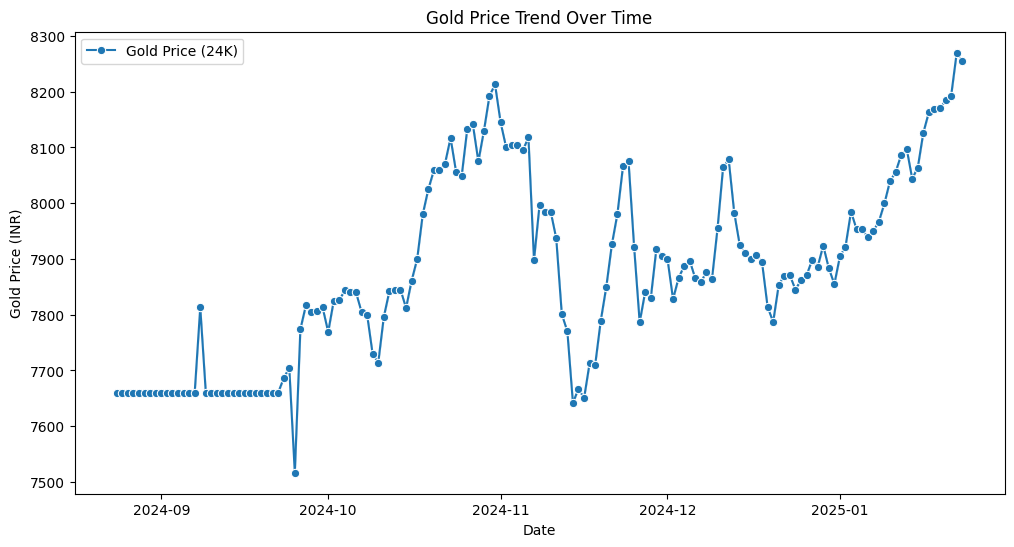

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

sales = sales.merge(daily_rates, left_on="Bill_date", right_on="Date", how="left")

# Plot Gold Price vs. Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales["Bill_date"], y=sales["Gold_RTGS_24K"], marker="o", label="Gold Price (24K)")
plt.title("Gold Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Gold Price (INR)")
plt.legend()
plt.show()


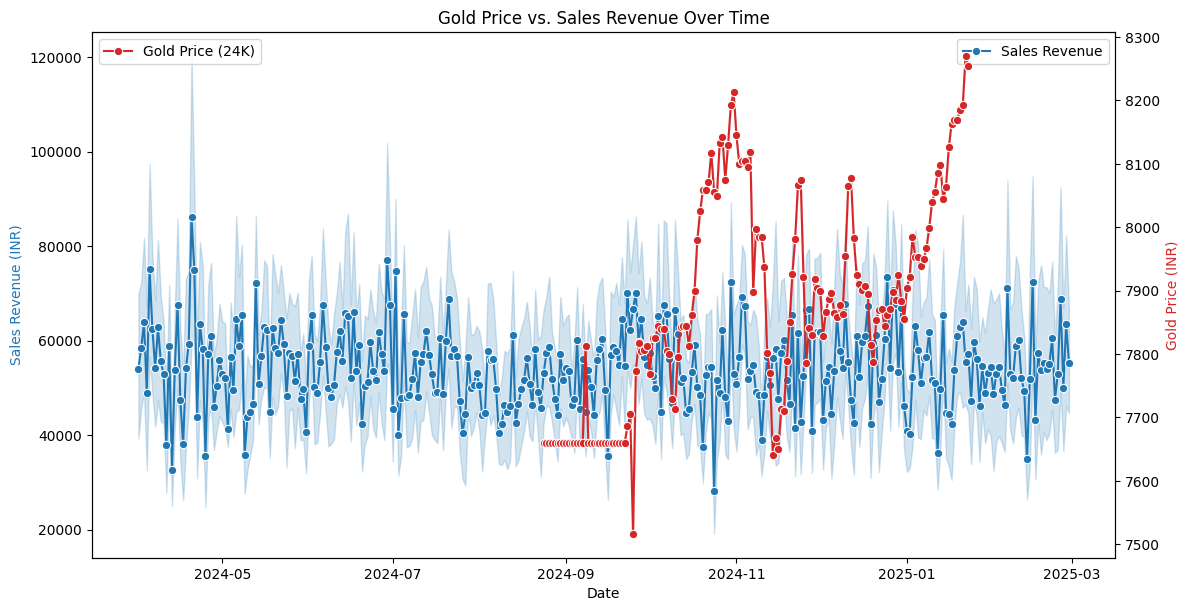

In [119]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot sales revenue
ax1.set_xlabel("Date")
ax1.set_ylabel("Sales Revenue (INR)", color="tab:blue")
sns.lineplot(x=sales["Bill_date"], y=sales["Sales_Value"], marker="o", ax=ax1, label="Sales Revenue", color="tab:blue")

# Create a second y-axis for gold price
ax2 = ax1.twinx()
ax2.set_ylabel("Gold Price (INR)", color="tab:red")
sns.lineplot(x=sales["Bill_date"], y=sales["Gold_RTGS_24K"], marker="o", ax=ax2, label="Gold Price (24K)", color="tab:red")

fig.tight_layout()
plt.title("Gold Price vs. Sales Revenue Over Time")
plt.show()


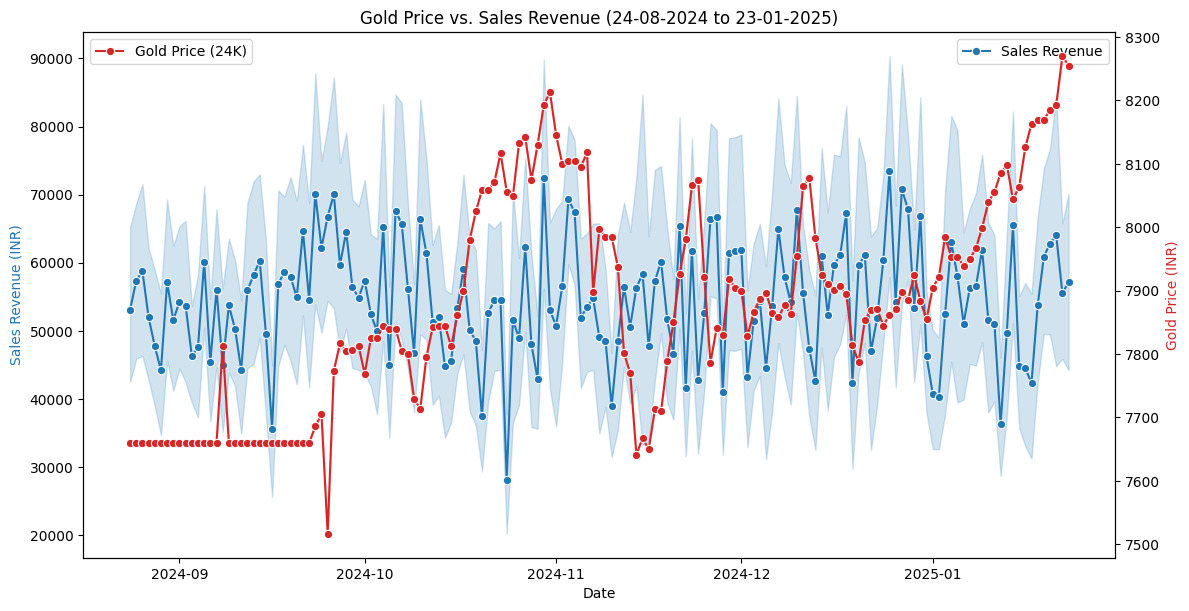

In [120]:
# Convert Bill_date to datetime format if not already
sales["Bill_date"] = pd.to_datetime(sales["Bill_date"])

# Define the date range
start_date = "2024-08-24"
end_date = "2025-01-23"

# Filter data within the date range
filtered_sales = sales[(sales["Bill_date"] >= start_date) & (sales["Bill_date"] <= end_date)]

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot sales revenue
ax1.set_xlabel("Date")
ax1.set_ylabel("Sales Revenue (INR)", color="tab:blue")
sns.lineplot(x=filtered_sales["Bill_date"], y=filtered_sales["Sales_Value"], marker="o", ax=ax1, label="Sales Revenue", color="tab:blue")

# Create a second y-axis for gold price
ax2 = ax1.twinx()
ax2.set_ylabel("Gold Price (INR)", color="tab:red")
sns.lineplot(x=filtered_sales["Bill_date"], y=filtered_sales["Gold_RTGS_24K"], marker="o", ax=ax2, label="Gold Price (24K)", color="tab:red")

fig.tight_layout()
plt.title("Gold Price vs. Sales Revenue (24-08-2024 to 23-01-2025)")
plt.show()


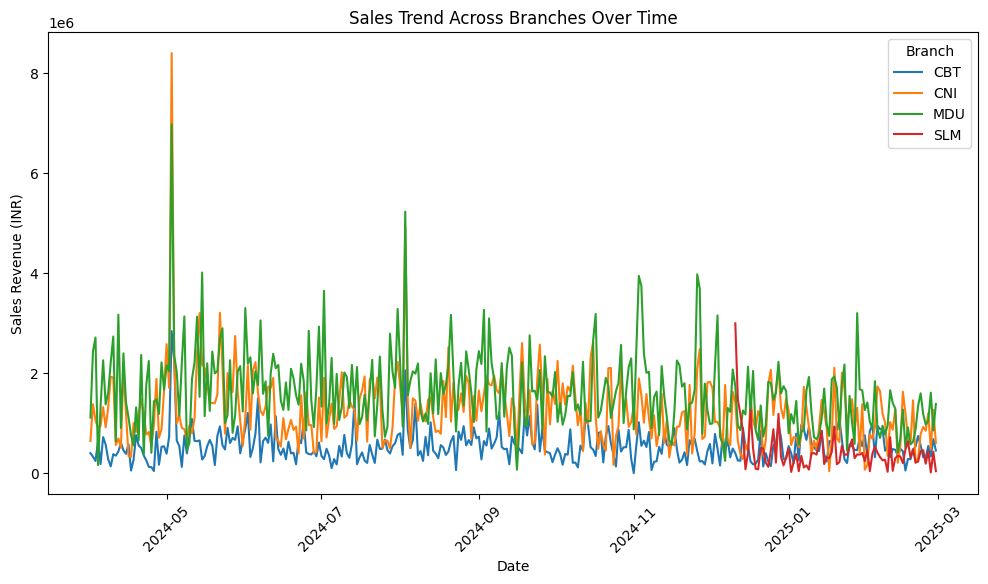

In [122]:
# Aggregate sales by Branch and Date
branch_sales = sales.groupby(["Branch", "Bill_date"]).agg({"Sales_Value": "sum", "Gold_RTGS_24K": "mean"}).reset_index()

# Plot sales vs. gold price for each branch
plt.figure(figsize=(12,6))
sns.lineplot(data=branch_sales, x="Bill_date", y="Sales_Value", hue="Branch")
plt.title("Sales Trend Across Branches Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Revenue (INR)")
plt.xticks(rotation=45)
plt.legend(title="Branch")
plt.show()


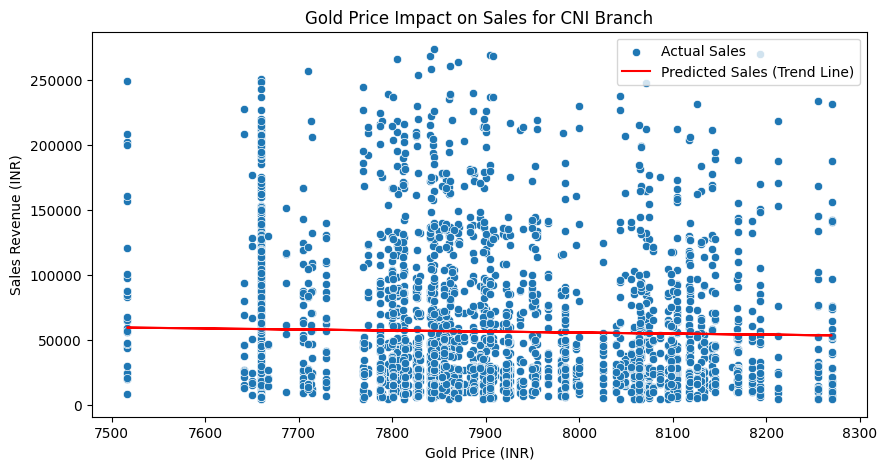

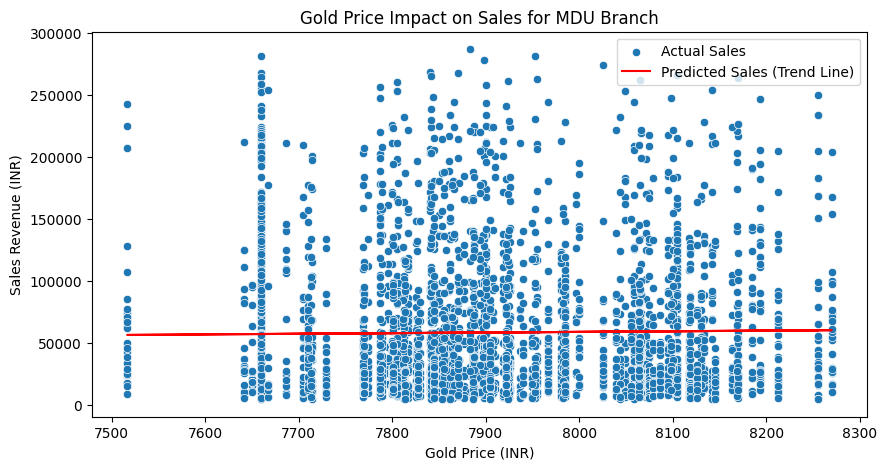

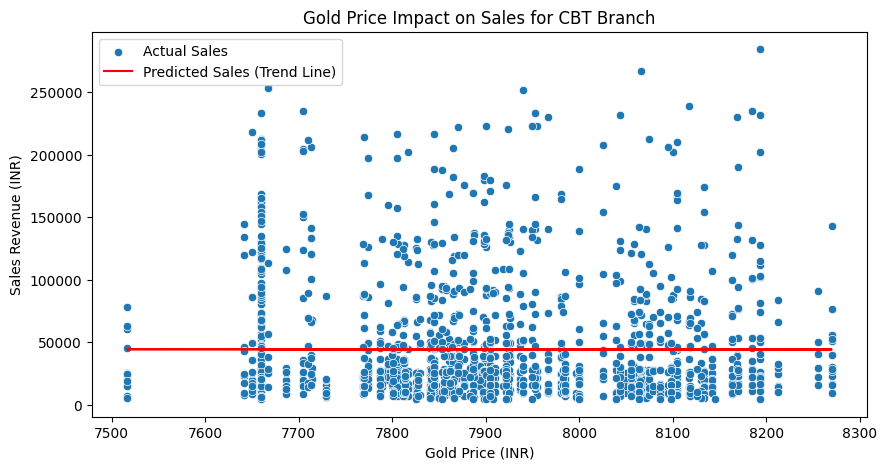

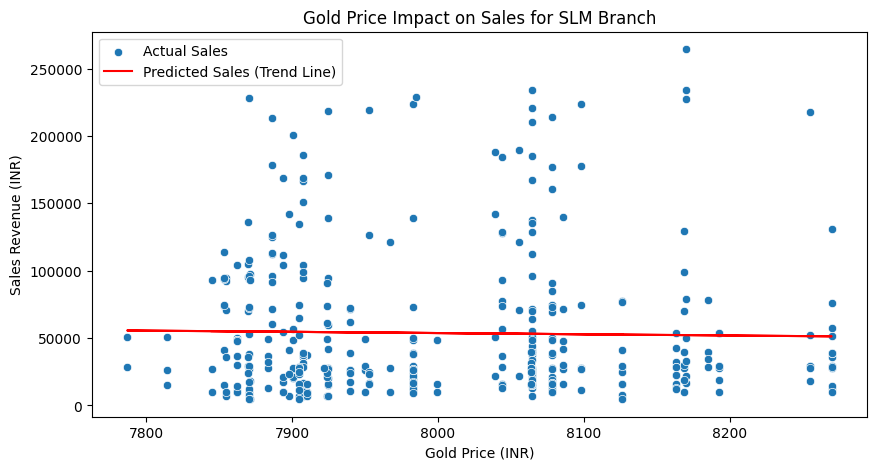

In [125]:
from sklearn.linear_model import LinearRegression

# Function to fit and plot regression per branch
def plot_branch_regression(branch):
    subset = sales[sales["Branch"] == branch].dropna(subset=["Gold_RTGS_24K", "Sales_Value"])  # Remove NaNs

    if subset.empty:  # Skip if no data after dropping NaNs
        print(f"Skipping {branch} branch due to insufficient data.")
        return

    X = subset["Gold_RTGS_24K"].values.reshape(-1,1)
    y = subset["Sales_Value"].values.reshape(-1,1)

    model = LinearRegression()
    model.fit(X, y)
    predicted_sales = model.predict(X)

    plt.figure(figsize=(10,5))
    sns.scatterplot(x=subset["Gold_RTGS_24K"], y=subset["Sales_Value"], label="Actual Sales")
    plt.plot(subset["Gold_RTGS_24K"], predicted_sales, color="red", label="Predicted Sales (Trend Line)")
    plt.title(f"Gold Price Impact on Sales for {branch} Branch")
    plt.xlabel("Gold Price (INR)")
    plt.ylabel("Sales Revenue (INR)")
    plt.legend()
    plt.show()

# Apply regression analysis for each branch
for branch in sales["Branch"].dropna().unique():
    plot_branch_regression(branch)


🔹 Model Performance Metrics:
R² Score: 0.9100
Mean Absolute Error (MAE): 7213.30
Root Mean Squared Error (RMSE): 15923.71

🔹 Feature Importance (Impact on Sales):
         Feature  Coefficient
0  Gold_RTGS_24K     0.015837
1            Age    -0.141259
2     Weight Min     0.378072
3     Weight Max     0.653843
4            Pcs     0.084114


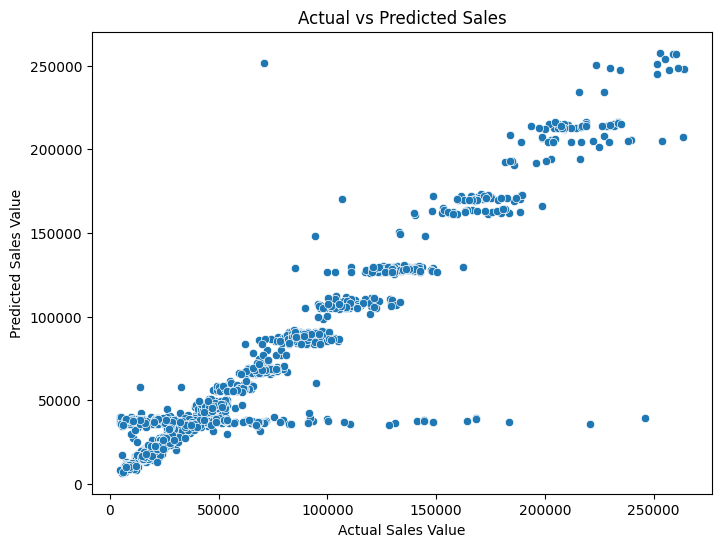

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load preprocessed sales data
sales_data = pd.read_csv("Sales_Data.csv")  # Use your cleaned file
gold_prices = pd.read_csv("Daily_Rate.csv")  # Use your cleaned file

# Convert date columns to datetime format
sales_data["Bill_date"] = pd.to_datetime(sales_data["Bill_date"])
gold_prices["Date"] = pd.to_datetime(gold_prices["Date"])

# Merge sales data with gold price data
merged_df = sales_data.merge(gold_prices, left_on="Bill_date", right_on="Date", how="left")

# Select relevant features for regression
features = ["Gold_RTGS_24K", "Age", "Weight Min", "Weight Max", "Pcs"]
target = "Sales_Value"

# Drop rows with missing values
merged_df = merged_df.dropna(subset=features + [target])

# Define independent (X) and dependent (y) variables
X = merged_df[features]
y = merged_df[[target]]  # Keep y as DataFrame for scaler compatibility

# Apply Min-Max Scaling
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions (in normalized scale)
y_pred_scaled = model.predict(X_test)

# Convert predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Evaluate model performance
r2 = r2_score(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

# Display model results
print("🔹 Model Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Show feature importance
coefficients = pd.DataFrame({"Feature": features, "Coefficient": model.coef_[0]})
print("\n🔹 Feature Importance (Impact on Sales):")
print(coefficients)

# Visualize actual vs predicted sales
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_original.flatten(), y=y_pred.flatten())
plt.xlabel("Actual Sales Value")
plt.ylabel("Predicted Sales Value")
plt.title("Actual vs Predicted Sales")
plt.show()


🔹 Model Performance Metrics:
R² Score: 0.9100
Mean Absolute Error (MAE): 7213.30
Root Mean Squared Error (RMSE): 15923.71

🔹 Feature Importance:
         Feature  Coefficient  Normalized Coefficient
0  Gold_RTGS_24K     5.930112                0.001784
1            Age    -2.061812               -0.000620
2     Weight Min  2051.339922                0.617150
3     Weight Max  3323.890080                1.000000
4            Pcs  2966.498142                0.892478


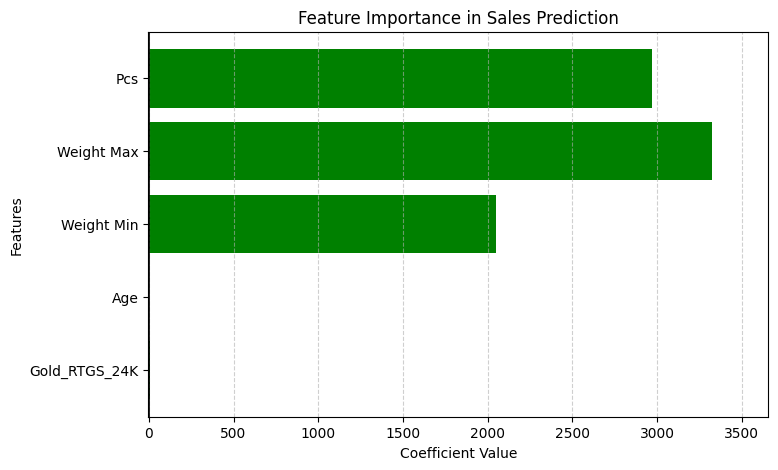

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the sales data (Ensure 'Bill_date' is datetime)
df = sales_data.merge(gold_prices, left_on="Bill_date", right_on="Date", how="left")

# Selecting features and target variable
features = ['Gold_RTGS_24K', 'Age', 'Weight Min', 'Weight Max', 'Pcs']
target = 'Sales_Value'

# Drop rows with missing values
df = df.dropna(subset=features + [target])

# Define independent and dependent variables
X = df[features]
y = df[target]

# Ensure no NaNs in X
if X.isnull().sum().sum() > 0:
    print("Warning: NaN values found in X, replacing with median values.")
    X = X.fillna(X.median())

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})

# Convert coefficients to float (ensure correct data type)
feature_importance["Coefficient"] = feature_importance["Coefficient"].astype(float)

# Normalize feature importance for better visibility
feature_importance["Normalized Coefficient"] = feature_importance["Coefficient"] / feature_importance["Coefficient"].abs().max()

# Model Performance Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display Results
print("🔹 Model Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

print("\n🔹 Feature Importance:")
print(feature_importance)

# Visualization of Feature Importance
plt.figure(figsize=(8, 5))
plt.barh(
    feature_importance["Feature"],
    feature_importance["Coefficient"],
    color=['green' if coef > 0 else 'red' for coef in feature_importance["Coefficient"]]
)
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in Sales Prediction")
plt.axvline(0, color='black', linewidth=1.2)  # Vertical reference line
plt.xlim(min(feature_importance["Coefficient"]) * 1.1, max(feature_importance["Coefficient"]) * 1.1)  # Expand limits
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.181e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


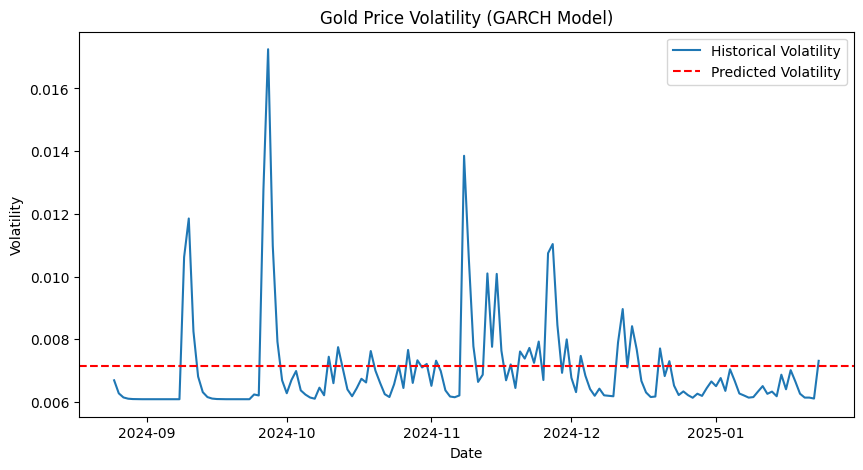

✅ Volatility is Stable. Normal procurement can continue.


In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# 🔹 Load Data
df = pd.read_csv('Daily_Rate.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index()

# 🔹 Select Gold_RTGS_24K Prices for Analysis
df['Gold_RTGS_24K'] = df['Gold_RTGS_24K'].astype(float)

# 🔹 Calculate Log Returns
df['Log_Returns'] = np.log(df['Gold_RTGS_24K'] / df['Gold_RTGS_24K'].shift(1))
df.dropna(inplace=True)

# 🔹 Fit a GARCH(1,1) Model
model = arch_model(df['Log_Returns'], vol='Garch', p=1, q=1)
garch_result = model.fit(disp='off')

# 🔹 Forecast Future Volatility
forecast = garch_result.forecast(start=df.index[-1], horizon=30)

# 🔹 Extract Predicted Volatility
if not forecast.variance.empty:
    pred_volatility = np.sqrt(forecast.variance.iloc[-1].values)  # Fix index issue
else:
    pred_volatility = [0] * 30  # Default to zero if empty

# 🔹 Plot Historical & Predicted Volatility
plt.figure(figsize=(10,5))
plt.plot(df.index, garch_result.conditional_volatility, label="Historical Volatility")
plt.axhline(y=np.mean(pred_volatility), color='r', linestyle='--', label="Predicted Volatility")
plt.title("Gold Price Volatility (GARCH Model)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# 🔹 Business Interpretation
high_vol_threshold = np.percentile(garch_result.conditional_volatility, 75)
if np.mean(pred_volatility) > high_vol_threshold:
    print("⚠️ High Volatility Expected! Consider Hedging or Delaying Purchases.")
else:
    print("✅ Volatility is Stable. Normal procurement can continue.")


In [144]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 13.6 MB/s eta 0:00:00


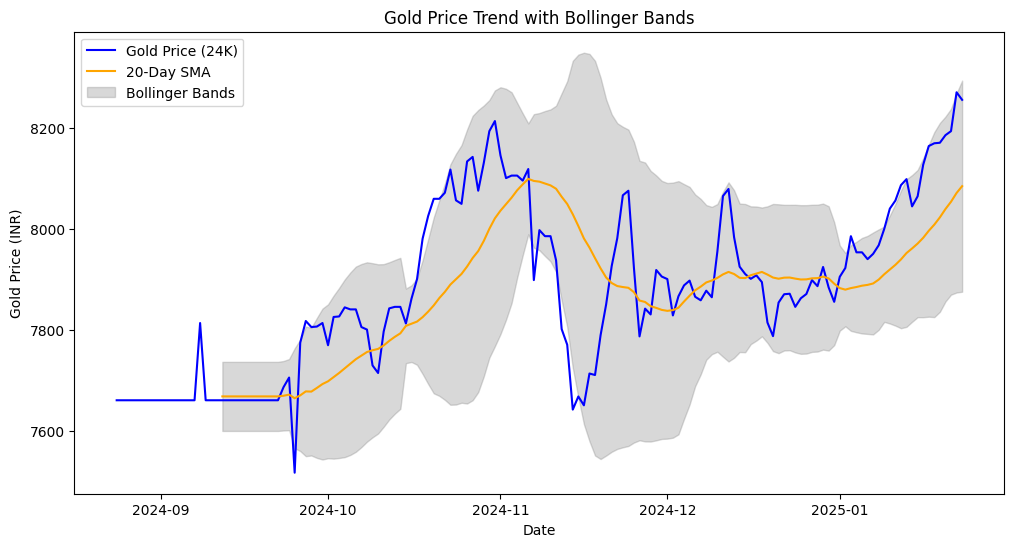

📊 Gold price is within the normal range. Monitor for opportunities.


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Load Data
df = pd.read_csv('Daily_Rate.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index()

# 🔹 Select Gold_RTGS_24K Prices
df['Gold_RTGS_24K'] = df['Gold_RTGS_24K'].astype(float)

# 🔹 Compute 20-Day Moving Average
df['SMA_20'] = df['Gold_RTGS_24K'].rolling(window=20).mean()

# 🔹 Compute Bollinger Bands (Upper & Lower)
df['STD_20'] = df['Gold_RTGS_24K'].rolling(window=20).std()
df['Upper_Band'] = df['SMA_20'] + (2 * df['STD_20'])
df['Lower_Band'] = df['SMA_20'] - (2 * df['STD_20'])

# 🔹 Plotting Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Gold_RTGS_24K'], label='Gold Price (24K)', color='blue')
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', color='orange')
plt.fill_between(df.index, df['Upper_Band'], df['Lower_Band'], color='gray', alpha=0.3, label="Bollinger Bands")
plt.title("Gold Price Trend with Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Gold Price (INR)")
plt.legend()
plt.show()

# 🔹 Business Insights
latest_price = df['Gold_RTGS_24K'].iloc[-1]
upper_band = df['Upper_Band'].iloc[-1]
lower_band = df['Lower_Band'].iloc[-1]

if latest_price > upper_band:
    print("⚠️ Gold price is in an overbought zone. Consider delaying purchases.")
elif latest_price < lower_band:
    print("✅ Gold price is in an oversold zone. Consider buying now.")
else:
    print("📊 Gold price is within the normal range. Monitor for opportunities.")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


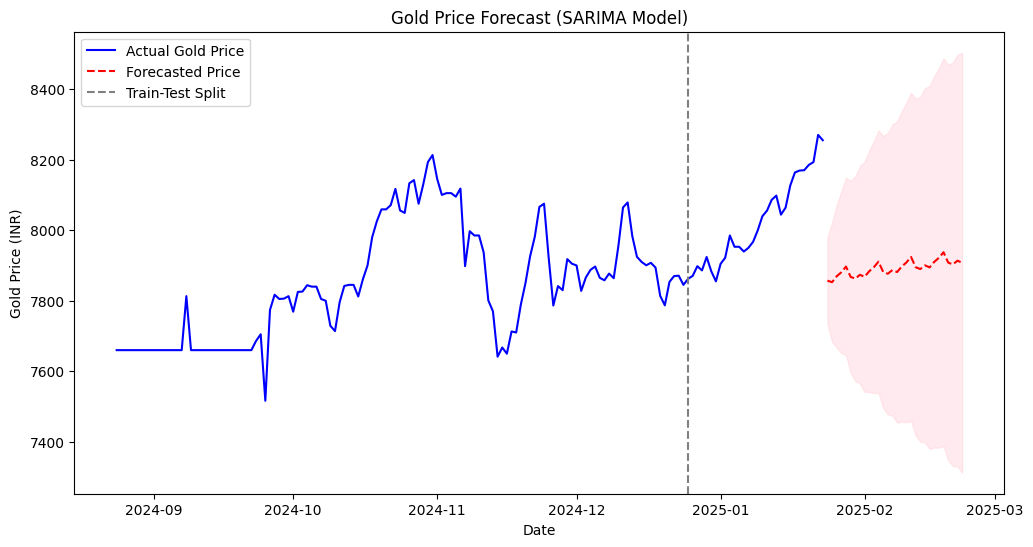

✅ Forecast suggests a lower price next week. Consider delaying purchases.
✅ Long-term trend suggests a price drop. Plan procurement accordingly.


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 🔹 Load Data
df = pd.read_csv('Daily_Rate.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index()

# 🔹 Select Gold_RTGS_24K for Forecasting
df['Gold_RTGS_24K'] = df['Gold_RTGS_24K'].astype(float)

# 🔹 Train-Test Split (Last 30 Days as Test Set)
train = df.iloc[:-30]
test = df.iloc[-30:]

# 🔹 Fit SARIMA Model (Auto-tune hyperparameters if needed)
model = SARIMAX(train['Gold_RTGS_24K'],
                order=(1,1,1), seasonal_order=(1,1,1,7),
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# 🔹 Forecast Future Prices (Next 30 Days)
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps+1, freq='D')[1:]
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 🔹 Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Gold_RTGS_24K'], label='Actual Gold Price', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted Price', color='red', linestyle='dashed')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.axvline(test.index[0], color='gray', linestyle='--', label="Train-Test Split")
plt.title("Gold Price Forecast (SARIMA Model)")
plt.xlabel("Date")
plt.ylabel("Gold Price (INR)")
plt.legend()
plt.show()

# 🔹 Business Insights
next_week_price = forecast_values.iloc[6]
next_month_price = forecast_values.iloc[29]

if next_week_price < df['Gold_RTGS_24K'].iloc[-1]:
    print("✅ Forecast suggests a lower price next week. Consider delaying purchases.")
else:
    print("⚠️ Prices may rise. Lock in purchases now if needed.")

if next_month_price < df['Gold_RTGS_24K'].iloc[-1]:
    print("✅ Long-term trend suggests a price drop. Plan procurement accordingly.")
else:
    print("⚠️ Prices are expected to increase. Consider securing inventory now.")


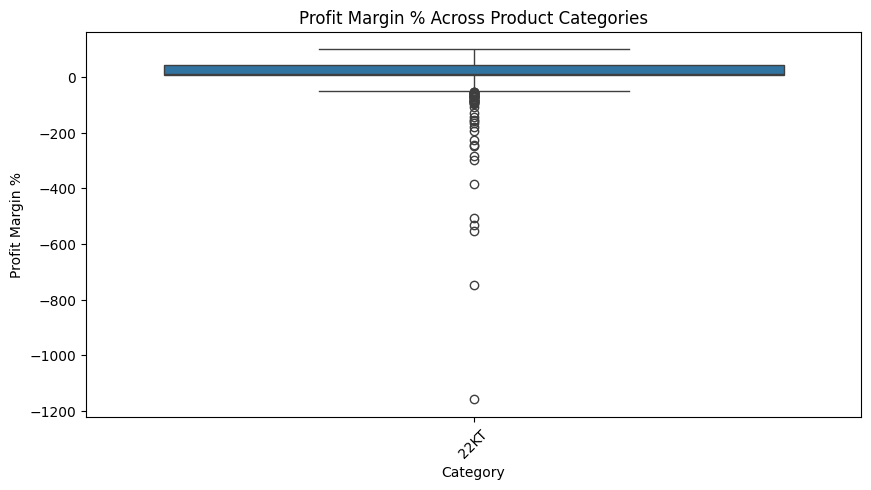

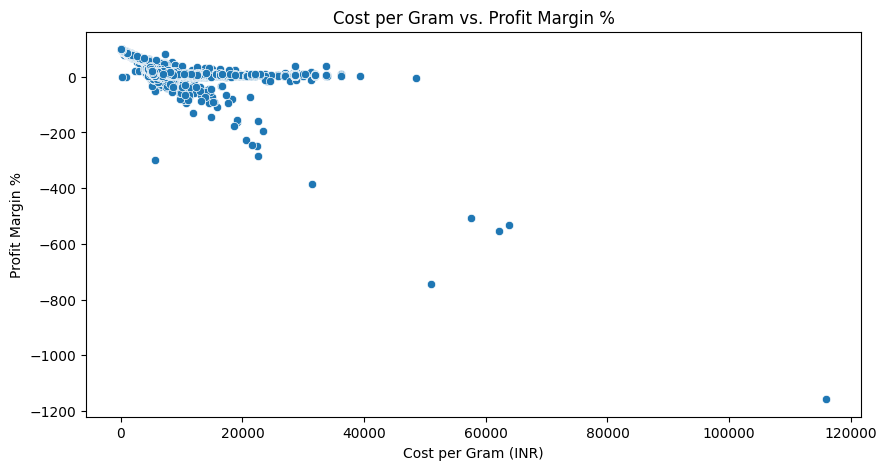

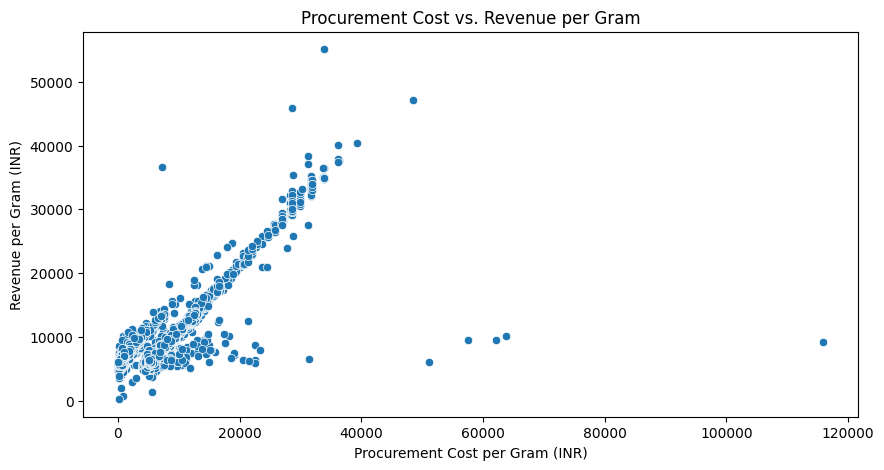

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Sales Data
sales_data = pd.read_csv("Sales_Data.csv")

# Calculate Additional Metrics
sales_data['Profit'] = sales_data['Sales_Value'] - sales_data['Purchase Value']
sales_data['Profit Margin %'] = (sales_data['Profit'] / sales_data['Sales_Value']) * 100
sales_data['Cost per Gram'] = sales_data['Purchase Value'] / sales_data['Gwt(Grams)']
sales_data['Revenue per Gram'] = sales_data['Sales_Value'] / sales_data['Gwt(Grams)']

# --- Profit Margin Decomposition ---
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Profit Margin %', data=sales_data)
plt.title("Profit Margin % Across Product Categories")
plt.xticks(rotation=45)
plt.show()

# --- Cost Sensitivity Analysis ---
plt.figure(figsize=(10, 5))
sns.scatterplot(x=sales_data['Cost per Gram'], y=sales_data['Profit Margin %'])
plt.title("Cost per Gram vs. Profit Margin %")
plt.xlabel("Cost per Gram (INR)")
plt.ylabel("Profit Margin %")
plt.show()

# --- Revenue per Gram vs. Procurement Cost ---
plt.figure(figsize=(10, 5))
sns.scatterplot(x=sales_data['Cost per Gram'], y=sales_data['Revenue per Gram'])
plt.title("Procurement Cost vs. Revenue per Gram")
plt.xlabel("Procurement Cost per Gram (INR)")
plt.ylabel("Revenue per Gram (INR)")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


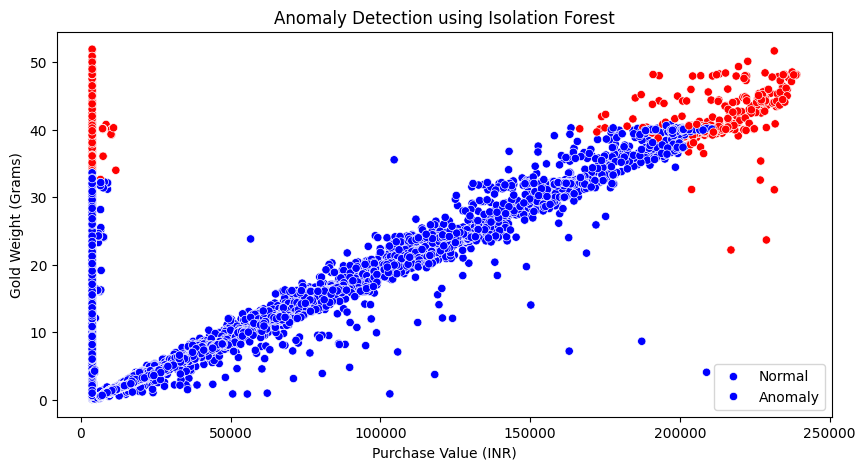

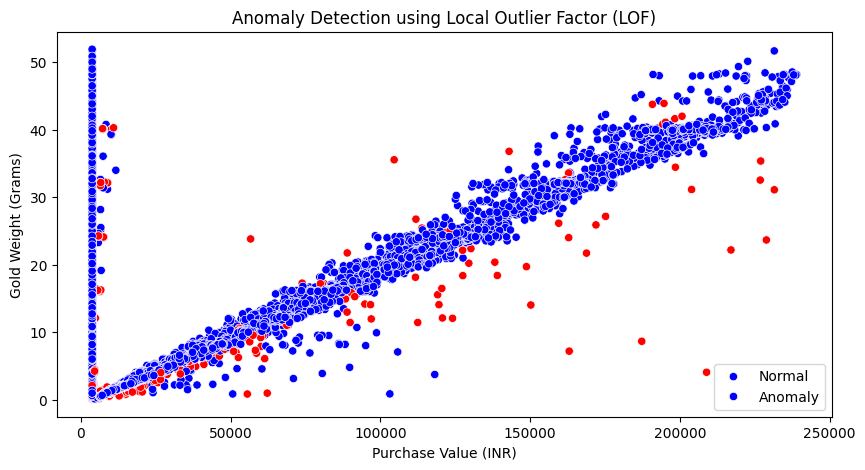

Anomalies detected by Isolation Forest:
         Bill_date  Purchase Value  Gwt(Grams)
1      2024-04-08       205343.43       40.58
4      2024-04-14       207175.04       39.44
21     2024-04-05       206538.90       40.82
28     2024-04-14       207847.74       39.53
33     2024-04-18       210256.35       40.23
...           ...             ...         ...
21711  2025-02-24       234292.51       44.46
21713  2025-02-25       207912.87       36.47
21716  2025-02-27       203522.25       37.79
21724  2025-02-06       217655.93       42.60
21725  2025-02-06       204527.78       38.08

[434 rows x 3 columns]

Anomalies detected by LOF:
         Bill_date  Purchase Value  Gwt(Grams)
294    2024-04-06         3750.00       40.81
334    2024-04-09        56663.00       23.83
401    2024-04-18         3750.00        2.01
402    2024-04-18         3750.00        2.01
407    2024-04-21         3750.00        0.98
...           ...             ...         ...
21664  2025-02-19        26660.9

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
df = pd.read_csv("Sales_Data.csv")

# Selecting relevant features for anomaly detection
features = ['Purchase Value', 'Gwt(Grams)']
df_filtered = df[features]

# Normalize data
df_filtered = (df_filtered - df_filtered.mean()) / df_filtered.std()

# --- Isolation Forest Model ---
iso_forest = IsolationForest(contamination=0.02, random_state=42)
df['Anomaly_IF'] = iso_forest.fit_predict(df_filtered)

# --- Local Outlier Factor Model ---
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
df['Anomaly_LOF'] = lof.fit_predict(df_filtered)

# Convert anomalies (-1) to Boolean for visualization
df['Anomaly_IF'] = df['Anomaly_IF'].apply(lambda x: 1 if x == -1 else 0)
df['Anomaly_LOF'] = df['Anomaly_LOF'].apply(lambda x: 1 if x == -1 else 0)

# --- Visualization: Isolation Forest ---
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Purchase Value'], y=df['Gwt(Grams)'], hue=df['Anomaly_IF'], palette={0: 'blue', 1: 'red'})
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Purchase Value (INR)")
plt.ylabel("Gold Weight (Grams)")
plt.legend(['Normal', 'Anomaly'])
plt.show()

# --- Visualization: Local Outlier Factor ---
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Purchase Value'], y=df['Gwt(Grams)'], hue=df['Anomaly_LOF'], palette={0: 'blue', 1: 'red'})
plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.xlabel("Purchase Value (INR)")
plt.ylabel("Gold Weight (Grams)")
plt.legend(['Normal', 'Anomaly'])
plt.show()

# Display detected anomalies
anomalies_if = df[df['Anomaly_IF'] == 1]
anomalies_lof = df[df['Anomaly_LOF'] == 1]

print("Anomalies detected by Isolation Forest:\n", anomalies_if[['Bill_date', 'Purchase Value', 'Gwt(Grams)']])
print("\nAnomalies detected by LOF:\n", anomalies_lof[['Bill_date', 'Purchase Value', 'Gwt(Grams)']])


In [160]:
import pandas as pd

# List of Tamil Nadu holidays, festivals, and important muhurthams
data = [
    # Festivals & Public Holidays (2024-2025)
    ("2024-01-01", "New Year"),
    ("2024-01-15", "Pongal"),
    ("2024-01-16", "Thiruvalluvar Day"),
    ("2024-01-17", "Uzhavar Thirunal"),
    ("2024-03-08", "Maha Shivaratri"),
    ("2024-03-25", "Holi"),
    ("2024-04-14", "Tamil New Year"),
    ("2024-04-17", "Ramzan"),
    ("2024-05-10", "Akshaya Tritiya"),
    ("2024-08-19", "Varalakshmi Vratham"),
    ("2024-09-07", "Vinayagar Chaturthi"),
    ("2024-10-12", "Navaratri Begins"),
    ("2024-10-20", "Vijayadashami"),
    ("2024-10-31", "Diwali"),
    ("2025-01-14", "Bhogi"),
    ("2025-01-15", "Pongal"),
    ("2025-01-16", "Thiruvalluvar Day"),
    ("2025-01-17", "Uzhavar Thirunal"),

    # Important Wedding Muhurthams (Based on Tamil Calendar)
    ("2024-02-07", "Wedding Muhurtham"),
    ("2024-02-25", "Wedding Muhurtham"),
    ("2024-03-15", "Wedding Muhurtham"),
    ("2024-06-10", "Wedding Muhurtham"),
    ("2024-07-19", "Wedding Muhurtham"),
    ("2024-11-18", "Wedding Muhurtham"),
    ("2024-12-05", "Wedding Muhurtham"),
    ("2025-01-20", "Wedding Muhurtham"),

    # Other Auspicious Gold Buying Days
    ("2024-05-10", "Akshaya Tritiya - Best Day to Buy Gold"),
    ("2024-10-20", "Vijayadashami - Good for Investments"),
    ("2024-08-19", "Varalakshmi Vratham - Favorable for Gold Purchase"),
    ("2024-09-07", "Vinayagar Chaturthi - Auspicious for Wealth"),
]

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Date", "Occasion"])

# Save as CSV
df.to_csv("TamilNadu_Holidays_Muhurthams.csv", index=False)

print("CSV file generated: TamilNadu_Holidays_Muhurthams.csv")


CSV file generated: TamilNadu_Holidays_Muhurthams.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=9.76 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1353.428, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1356.933, Time=2.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1356.905, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1351.503, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1355.428, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=1355.428, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=1357.368, Time=1.30 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1354.933, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1354.906, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 14.985 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  123
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -674.752
Date:                Thu, 20 Feb 2025   AIC                           1351.503
Time:                        19:13:35   BIC                           1354.307
Sample:                    08-24-2024   HQIC                          1352.642
                         - 12-24-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3727.9986    278.967     13.364      0.000    3181.234    4

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


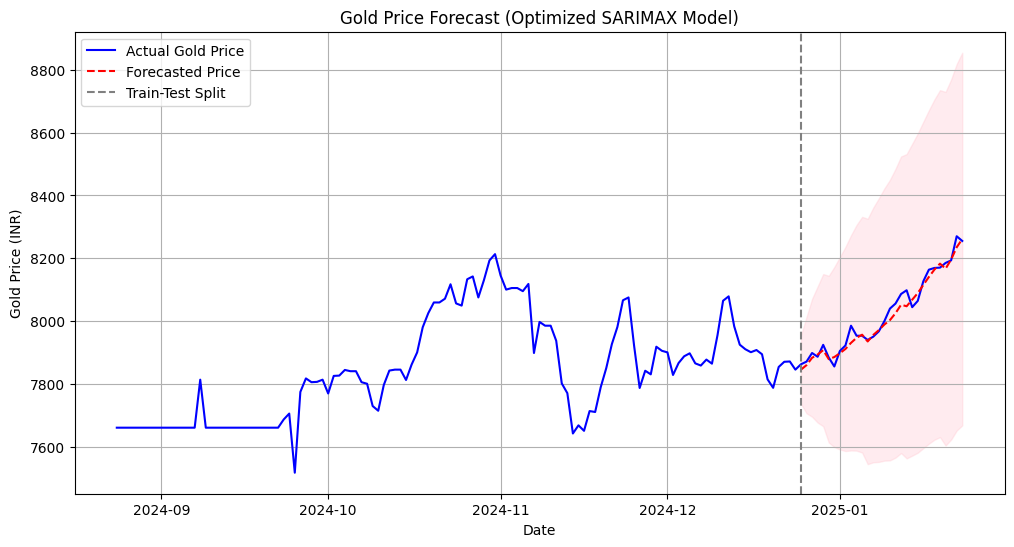

✅ Forecast suggests a lower price next week. Consider delaying purchases.
⚠️ Prices are expected to increase. Consider securing inventory now.


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🔹 Load Data
df = pd.read_csv('Daily_Rate.csv', parse_dates=['Date'], index_col='Date')
muhurtham_df = pd.read_csv('TamilNadu_Holidays_Muhurthams.csv', parse_dates=['Date'])

# 🔹 Sort Data by Date
df = df.sort_index()

# 🔹 Add Muhurtham Indicator (1 if Muhurtham, else 0)
df["Is_Muhurtham"] = df.index.isin(muhurtham_df["Date"]).astype(int)

# 🔹 Add Day of the Week and Moving Average
df['Day_of_Week'] = df.index.dayofweek
df['MA7'] = df['Gold_RTGS_24K'].rolling(7).mean().fillna(df['Gold_RTGS_24K'])

# 🔹 Select Gold_RTGS_24K for Forecasting
df['Gold_RTGS_24K'] = df['Gold_RTGS_24K'].astype(float)

# 🔹 Log Transformation
df['Gold_RTGS_24K_log'] = np.log(df['Gold_RTGS_24K'])

# 🔹 Train-Test Split (Last 30 Days as Test Set)
train = df.iloc[:-30]
test = df.iloc[-30:]

# 🔹 Define Exogenous Variables
exog_vars = ['Is_Muhurtham', 'Day_of_Week', 'MA7']
exog_train = train[exog_vars]
exog_test = test[exog_vars]

# 🔹 Auto ARIMA for Best SARIMA Order
best_model = auto_arima(train['Gold_RTGS_24K'], exogenous=exog_train, seasonal=True, m=7,
                        d=None, D=None, trace=True, stepwise=True, suppress_warnings=True)
print(best_model.summary())

# 🔹 Fit Optimized SARIMAX Model
model = SARIMAX(train['Gold_RTGS_24K'],
                exog=exog_train,
                order=best_model.order,
                seasonal_order=best_model.seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# 🔹 Forecast Future Prices (Next 30 Days)
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps, exog=exog_test)
forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='D')

forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 🔹 Evaluation Metrics
y_true = test['Gold_RTGS_24K']
y_pred = forecast_values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"🔹 R² Score: {r2:.4f}")

# 🔹 Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Gold_RTGS_24K'], label='Actual Gold Price', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted Price', color='red', linestyle='dashed')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.axvline(test.index[0], color='gray', linestyle='--', label="Train-Test Split")
plt.title("Gold Price Forecast (Optimized SARIMAX Model)")
plt.xlabel("Date")
plt.ylabel("Gold Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

# 🔹 Business Insights
next_week_price = forecast_values.iloc[6]
next_month_price = forecast_values.iloc[29]

if next_week_price < df['Gold_RTGS_24K'].iloc[-1]:
    print("✅ Forecast suggests a lower price next week. Consider delaying purchases.")
else:
    print("⚠️ Prices may rise. Lock in purchases now if needed.")

if next_month_price < df['Gold_RTGS_24K'].iloc[-1]:
    print("✅ Long-term trend suggests a price drop. Plan procurement accordingly.")
else:
    print("⚠️ Prices are expected to increase. Consider securing inventory now.")

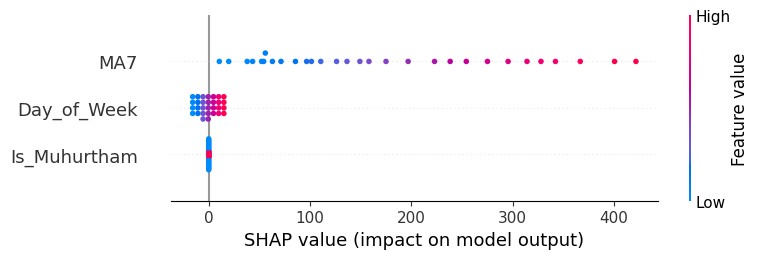

In [189]:
# 🔹 SHAP Feature Importance (Fixed)
def sarimax_predict(model, exog_data):
    return model.get_forecast(steps=len(exog_data), exog=exog_data).predicted_mean

# Create SHAP Explainer
explainer = shap.Explainer(lambda x: sarimax_predict(results, pd.DataFrame(x, columns=exog_train.columns)), exog_train)

# Compute SHAP values
shap_values = explainer(exog_test)

# Plot SHAP Summary
shap.summary_plot(shap_values, exog_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.89 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1353.428, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1356.933, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1356.905, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1351.503, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1355.428, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=1355.428, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=1357.368, Time=1.13 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1354.933, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1354.906, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=1.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 8.414 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  123
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -674.752
Date:                Thu, 20 Feb 2025   AIC                           1351.503
Time:                        19:20:25   BIC                           1354.307
Sample:                    08-24-2024   HQIC                          1352.642
                         - 12-24-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3727.9986    278.967     13.364      0.000    3181.234    42

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


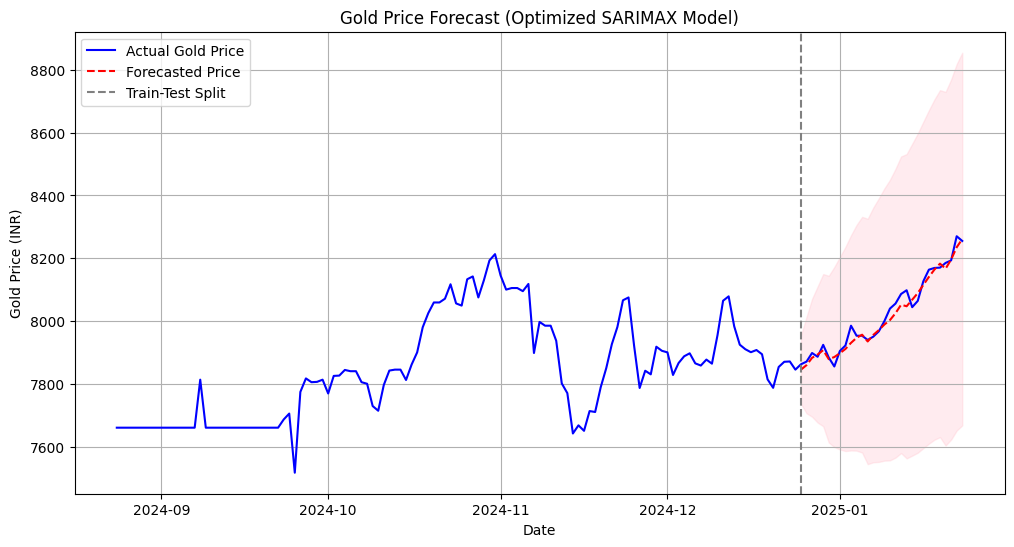

✅ Forecast suggests a lower price next week. Consider delaying purchases.
⚠️ Prices are expected to increase. Consider securing inventory now.


In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🔹 Load Data
df = pd.read_csv('Daily_Rate.csv', parse_dates=['Date'], index_col='Date')
muhurtham_df = pd.read_csv('TamilNadu_Holidays_Muhurthams.csv', parse_dates=['Date'])

# 🔹 Sort Data by Date
df = df.sort_index()

# 🔹 Add Muhurtham Indicator (1 if Muhurtham, else 0)
df["Is_Muhurtham"] = df.index.isin(muhurtham_df["Date"]).astype(int)

# 🔹 Add Day of the Week and Moving Average
df['Day_of_Week'] = df.index.dayofweek
df['MA7'] = df['Gold_RTGS_24K'].rolling(7).mean().fillna(df['Gold_RTGS_24K'])

# 🔹 Select Gold_RTGS_24K for Forecasting
df['Gold_RTGS_24K'] = df['Gold_RTGS_24K'].astype(float)

# 🔹 Log Transformation
df['Gold_RTGS_24K_log'] = np.log(df['Gold_RTGS_24K'])

# 🔹 Train-Test Split (Last 30 Days as Test Set)
train = df.iloc[:-30]
test = df.iloc[-30:]

# 🔹 Define Exogenous Variables
exog_vars = ['Is_Muhurtham', 'Day_of_Week', 'MA7']
exog_train = train[exog_vars]
exog_test = test[exog_vars]

# 🔹 Auto ARIMA for Best SARIMA Order
best_model = auto_arima(train['Gold_RTGS_24K'], exogenous=exog_train, seasonal=True, m=7,
                        d=None, D=None, trace=True, stepwise=True, suppress_warnings=True)
print(best_model.summary())

# 🔹 Fit Optimized SARIMAX Model
model = SARIMAX(train['Gold_RTGS_24K'],
                exog=exog_train,
                order=best_model.order,
                seasonal_order=best_model.seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# 🔹 Forecast Future Prices (Next 30 Days)
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps, exog=exog_test)
forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='D')

forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 🔹 Evaluation Metrics
y_true = test['Gold_RTGS_24K']
y_pred = forecast_values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"🔹 R² Score: {r2:.4f}")

# 🔹 Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Gold_RTGS_24K'], label='Actual Gold Price', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted Price', color='red', linestyle='dashed')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.axvline(test.index[0], color='gray', linestyle='--', label="Train-Test Split")
plt.title("Gold Price Forecast (Optimized SARIMAX Model)")
plt.xlabel("Date")
plt.ylabel("Gold Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

# 🔹 Business Insights
next_week_price = forecast_values.iloc[6]
next_month_price = forecast_values.iloc[29]

if next_week_price < df['Gold_RTGS_24K'].iloc[-1]:
    print("✅ Forecast suggests a lower price next week. Consider delaying purchases.")
else:
    print("⚠️ Prices may rise. Lock in purchases now if needed.")

if next_month_price < df['Gold_RTGS_24K'].iloc[-1]:
    print("✅ Long-term trend suggests a price drop. Plan procurement accordingly.")
else:
    print("⚠️ Prices are expected to increase. Consider securing inventory now.")